# Muestreo y distribuciones empíricas
Una parte importante de la ciencia de los datos consiste en sacar conclusiones basadas en los datos de las muestras aleatorias. Para interpretar correctamente sus resultados, los científicos de datos tienen que entender primero qué son exactamente las muestras aleatorias.

En este capítulo examinaremos con más detenimiento el muestreo, prestando especial atención a las propiedades de las muestras aleatorias grandes. 

Empecemos por dibujar algunas muestras. Nuestros ejemplos se basan en el conjunto de datos <code><a href="https://github.com/jphoyos/fup/blob/d0be740bc2f10991fc24008d4f5dac583c3aafd4/data/Peliculas_english.csv">peliculas_english.csv</a></code>.

In [1]:
import pandas as pd
import numpy as np

data = "https://raw.githubusercontent.com/jphoyos/fup/main/data/peliculas_english.csv"
peliculas = pd.read_csv(data)
peliculas

,Titulo,Estudio,Bruto,Bruto (Ajustado),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
...,...,...,...,...,...
195,The Caine Mutiny,Columbia,21750000,386173500,1954
196,The Bells of St. Mary's,RKO,21333333,545882400,1945
197,Duel in the Sun,Selz.,20408163,443877500,1946
198,Sergeant York,Warner Bros.,16361885,418671800,1941


In [2]:
cols_formato = peliculas.columns[[2, 3]]
peliculas[cols_formato] = peliculas[cols_formato].astype(float)
pd.options.display.float_format = '{:,.0f}'.format  # sin decimales, con miles


In [3]:
peliculas

,Titulo,Estudio,Bruto,Bruto (Ajustado),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
1,Avatar,Fox,"760,507,625","846,120,800",2009
2,Titanic,Paramount,"658,672,302","1,178,627,900",1997
3,Jurassic World,Universal,"652,270,625","687,728,000",2015
4,Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
...,...,...,...,...,...
195,The Caine Mutiny,Columbia,"21,750,000","386,173,500",1954
196,The Bells of St. Mary's,RKO,"21,333,333","545,882,400",1945
197,Duel in the Sun,Selz.,"20,408,163","443,877,500",1946
198,Sergeant York,Warner Bros.,"16,361,885","418,671,800",1941


<h2>Muestreo de filas de una tabla</h2>

Cada fila de una tabla de datos representa un individuo; en `peliculas`, cada individuo es una película. El muestreo de individuos se puede conseguir, por tanto, muestreando las filas de una tabla.

El contenido de una fila son los valores de diferentes variables medidos en el mismo individuo. Así, el contenido de las filas muestreadas forma muestras de valores de cada una de las variables.


<h2>Muestras deterministas</h2>

Cuando simplemente se especifica qué elementos de un conjunto se quieren elegir, sin que haya ningún azar de por medio, se crea una *muestra determinista*.

Esto se ha hecho muchas veces, por ejemplo, utilizando `iloc`:

In [4]:
peliculas.iloc[[3, 18, 100]]

,Titulo,Estudio,Bruto,Bruto (Ajustado),Year
3,Jurassic World,Universal,"652,270,625","687,728,000",2015
18,Spider-Man,Sony,"403,706,375","604,517,300",2002
100,Gone with the Wind,MGM,"198,676,459","1,757,788,200",1939


Tambien podrías haberse usado `where`:

In [5]:
peliculas[peliculas['Titulo'].str.contains('Harry Potter', case=False, na=False)]


,Titulo,Estudio,Bruto,Bruto (Ajustado),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,"381,011,219","417,512,200",2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,"317,575,550","486,442,900",2001
54,Harry Potter and the Half-Blood Prince,Warner Bros.,"301,959,197","352,098,800",2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,"292,004,738","369,250,200",2007
62,Harry Potter and the Goblet of Fire,Warner Bros.,"290,013,036","393,024,800",2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,"261,988,482","390,768,100",2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,"249,541,069","349,598,600",2004


Aunque son muestras, no son muestras aleatorias. No tienen que ver con el azar.


<h2>Muestras de probabilidad</h2>

Para describir las muestras aleatorias, será útil cierta terminología.

Una *población* es el conjunto de todos los elementos de los que se extrae una muestra.

Una *muestra probabilística* es aquella para la que es posible calcular, antes de extraer la muestra, la probabilidad con la que cualquier subconjunto de elementos entrará en la muestra.

En una muestra probabilística, no es necesario que todos los elementos tengan la misma probabilidad de ser elegidos. 

<h2>Un esquema de muestreo aleatorio</h2>

Por ejemplo, supongamos que se eligen dos personas de una población que consta de tres personas A, B y C, según el siguiente esquema:

- La persona A se elige con probabilidad 1.
- Una de las personas B o C se elige según el lanzamiento de una moneda: si la moneda sale cara, se elige B, y si sale cruz se elige C.

Se trata de una muestra de probabilidad de tamaño 2. Estas son las probabilidades de entrada para todos los subconjuntos no vacíos:

    A: 1 
    B: 1/2
    C: 1/2
    AB: 1/2
    AC: 1/2
    BC: 0
    ABC 0

La persona A tiene una mayor probabilidad de ser seleccionada que las personas B o C; de hecho, la persona A está segura de ser seleccionada. Dado que estas diferencias son conocidas y cuantificadas, pueden tenerse en cuenta al trabajar con la muestra. 


<h2>Una muestra sistemática</h2>

Imagina que todos los elementos de la población se enumeran en una secuencia. Un método de muestreo comienza eligiendo una posición al azar al principio de la lista, y luego posiciones uniformemente espaciadas después. La muestra se compone de los elementos en esas posiciones. Este tipo de muestra se denomina *muestra sistemática*. 

Aquí elegiremos una muestra sistemática de las filas de `top`. Empezaremos escogiendo una de las 10 primeras filas al azar, y luego escogeremos cada 10 filas después.

In [17]:
"""Elige un inicio aleatorio entre las filas 0 a 9;
luego tomar cada 10 filas"""

inicio = np.random.choice(np.arange(10))
peliculas.iloc[np.arange(inicio, len(peliculas),10)]

,Titulo,Estudio,Bruto,Bruto (Ajustado),Year
7,Star Wars,Fox,"460,998,007","1,549,640,500",1977
17,The Hunger Games,Lionsgate,"408,010,692","442,510,400",2012
27,The Passion of the Christ,NM,"370,782,930","519,432,100",2004
37,Alice in Wonderland (2010),Buena Vista (Disney),"334,191,110","365,718,600",2010
47,Star Wars: Episode II - Attack of the Clones,Fox,"310,676,740","465,175,700",2002
57,The Sixth Sense,Buena Vista (Disney),"293,506,292","500,938,400",1999
67,The Hangover,Warner Bros.,"277,322,503","323,343,300",2009
77,Raiders of the Lost Ark,Paramount,"248,159,971","770,183,000",1981
87,The Lost World: Jurassic Park,Universal,"229,086,679","434,216,600",1997
97,Austin Powers: The Spy Who Shagged Me,New Line,"206,040,086","352,863,900",1999


Ejecute la célula unas cuantas veces para ver cómo cambia el resultado. 

Esta muestra sistemática es una **muestra probabilística**. En este esquema, todas las filas tienen una probabilidad de $1/10$ de ser elegidas. Por ejemplo, la fila 23 se elige si y sólo si se elige la fila 3, y la probabilidad es de $1/10$. 

Pero no todos los subconjuntos tienen la misma probabilidad de ser elegidos. Como las filas seleccionadas están espaciadas uniformemente, la mayoría de los subconjuntos de filas no tienen ninguna posibilidad de ser elegidos. Los únicos subconjuntos que son posibles son los que consisten en filas separadas por múltiplos de 10. Cualquiera de estos subconjuntos se selecciona con una probabilidad de 1/10.  Otros subconjuntos, como el que contiene las 11 primeras filas de la tabla, se seleccionan con probabilidad 0

<h2>Muestras aleatorias extraídas con o sin reemplazo</h2>
 
En este curso, nos ocuparemos principalmente de los dos métodos más sencillos de muestreo. 

El primero es el muestreo aleatorio con reemplazo, que (como hemos visto antes) es el comportamiento por defecto de `np.random.choice` cuando muestrea de un array. 

El otro, llamado "muestreo aleatorio simple", es una muestra extraída al azar *sin* reemplazo. Los individuos muestreados no son reemplazados en la población antes de que se extraiga el siguiente individuo. Es el tipo de muestreo que se realiza, por ejemplo, cuando se reparte una mano de una baraja. 


La extracción de una muestra aleatoria requiere cuidado y precisión. No es azarosa, aunque ese sea un significado coloquial de la palabra "aleatoria". Si te pones en una esquina y tomas como muestra a las diez primeras personas que pasan por allí, podrías pensar que estás tomando una muestra al azar porque no has elegido a quien pasaba por allí. Pero no es una muestra aleatoria, es una *muestra de conveniencia*. No sabías de antemano la probabilidad de que cada persona entrara en la muestra; quizás ni siquiera habías especificado exactamente quiénes formaban parte de la población.

# Distribuciones empíricas

En la ciencia de los datos, la palabra "empírica" significa "observada". Las distribuciones empíricas son distribuciones de datos observados, como los datos de las muestras aleatorias.

En esta sección generaremos datos y veremos cómo es la distribución empírica. 

Nuestro escenario es un experimento sencillo: lanzar un dado varias veces y llevar la cuenta de qué cara aparece. La tabla `dado` contiene los números de puntos de las caras de un dado. Todos los números aparecen exactamente una vez, ya que estamos asumiendo que el dado es justo.

In [18]:
dado = pd.DataFrame({'Cara': np.arange(1, 7, 1)})
dado

,Cara
0,1
1,2
2,3
3,4
4,5
5,6


## Una distribución de probabilidad

El histograma de abajo nos ayuda a visualizar el hecho de que cada cara aparece con una probabilidad de 1/6. Decimos que el histograma muestra la *distribución* de probabilidades sobre todas las caras posibles. Dado que todas las barras representan el mismo porcentaje de probabilidad, la distribución se llama *uniforme en los enteros del 1 al 6.*

Text(0, 0.5, 'Porcentaje por unidad')

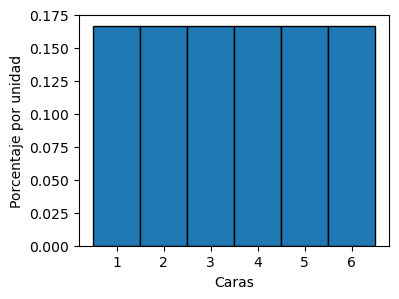

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

dado = pd.DataFrame({'Cara': np.arange(1, 7, 1)})
dado_bins = np.arange(0.5, 6.6, 1)

plt.figure(figsize=(4, 3))
plt.hist(x=dado['Cara'], bins=dado_bins, rwidth=1, density=True, edgecolor='black')
plt.xlabel('Caras')
plt.ylabel('Porcentaje por unidad')

Las variables cuyos valores sucesivos están separados por la misma cantidad fija, como los valores de los lanzamientos de un dado (valores sucesivos separados por 1), entran en una clase de variables que se llaman *discretas*. El histograma anterior se llama histograma *discreto*. Sus intervalos están especificados por la matriz `dado_bins` y aseguran que cada barra está centrada en el valor entero correspondiente. 

Es importante recordar que el dado no puede mostrar 1.3 puntos, o 5.2 puntos - siempre muestra un número entero de puntos. Pero nuestra visualización reparte la probabilidad de cada valor sobre el área de una barra. 

La probabilidad de cada cara es 1/6, que es el 16,67% cuando se redondea a dos decimales. La anchura de cada barra es de 1 unidad. Por tanto, la altura de cada barra es del 16,67% por unidad. Esto concuerda con las escalas horizontal y vertical del gráfico.

## Distribuciones empíricas
La distribución anterior consiste en la probabilidad teórica de cada cara. No se basa en **datos**. Se puede estudiar y entender sin necesidad de tirar ningún dado.

Las *distribuciones empíricas*, en cambio, son distribuciones de datos observados. Pueden visualizarse mediante **histogramas empíricos**. 

Obtengamos algunos datos simulando los lanzamientos de un dado. Esto puede hacerse mediante un muestreo aleatorio con reemplazo de los enteros del 1 al 6. Ya hemos utilizado antes `np.random.choice` para estas simulaciones. Pero ahora introduciremos un método de Tabla para hacerlo. Esto nos permitirá utilizar nuestros conocidos métodos de Tabla para la visualización.

El método de la tabla se llama `sample`. Extrae al azar con reemplazo de las filas de una tabla. Su argumento es el tamaño de la muestra y devuelve una tabla con las filas seleccionadas. Un argumento opcional `with_replacement=False` especifica que la muestra debe ser extraída sin reemplazo, pero eso no se aplica al lanzamiento de un dado.

Aquí están los resultados de 10 tiradas de un dado.

In [23]:
dado.sample(10, replace=True)

,Cara
2,3
5,6
4,5
1,2
1,2
3,4
0,1
4,5
4,5
2,3


In [26]:
dado.sample(6, replace=False)

,Cara
4,5
2,3
0,1
1,2
5,6
3,4


**Ejercicio:** Sin reemplazo puedo usar un n mayor que len(dado)?

Podemos utilizar el mismo método para simular tantos lanzamiento como queramos, y luego dibujar histogramas empíricos de los resultados. Como vamos a hacer esto repetidamente, definimos una función `hist_empirico_dado` que toma como argumento el tamaño de la muestra, lanza un dado tantas veces como su argumento, y luego dibuja un histograma de los resultados observados.

In [38]:
def hist_empirico_dado(n):
    
    plt.figure(figsize=(4,3))
    plt.hist(x=dado.sample(n, replace=True)['Cara'], 
             bins=np.arange(0.5, 7, 1), 
             rwidth=1, 
             density=True,
             edgecolor='black')
    plt.xlabel('Caras')
    plt.ylabel('Porcentaje por unidad')
    plt.show()

## Histogramas empíricos

Aquí hay un histograma empírico de 10 lanzamientos (tiradas). No se parece mucho al histograma de probabilidad anterior. Ejecuta la celda unas cuantas veces para ver cómo varía.

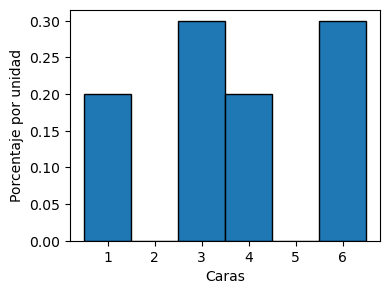

In [39]:
hist_empirico_dado(10)

Cuando el tamaño de la muestra aumenta, el histograma empírico empieza a parecerse más al histograma de probabilidades teóricas.

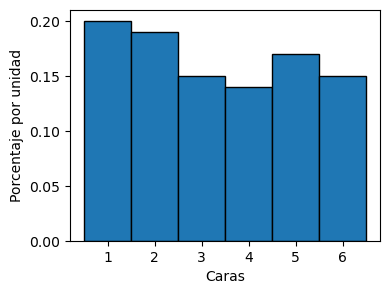

In [40]:
hist_empirico_dado(100)

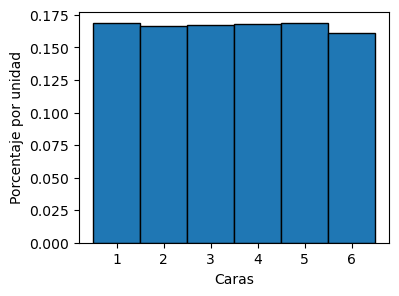

In [41]:
hist_empirico_dado(10000)

A medida que aumentamos el número de lanzamientos en la simulación, el área de cada barra se acerca al 16,67%, que es el área de cada barra en el histograma de probabilidad.

## La ley de las medias (promedios)

Lo que hemos observado arriba es un ejemplo de una regla general.

Si un experimento de azar se repite de forma independiente y en condiciones idénticas, a la larga, la proporción de veces que se produce un suceso se acerca cada vez más a la probabilidad teórica del mismo.

Por ejemplo, a largo plazo, la proporción de veces que aparece la cara con cuatro manchas se acerca cada vez más a 1/6.

Aquí, "de forma independiente y en condiciones idénticas" significa que cada repetición se realiza de la misma manera, independientemente de los resultados de todas las demás repeticiones.

La ley de los promedios también se cumple cuando la muestra aleatoria se extrae de los individuos de una población grande

In [1]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/jphoyos/fup/main/data/aerocivil2018_Bogota.csv')
data

,Unnamed: 0,Fecha,Sigla Empresa,Nombre Empresa,Trafico,Origen,Destino,Pasajeros,TipoVuelo,CargaKg,CorreoKg,Ciudad Origen,Ciudad Destino,Pais Origen,Pais Destino,Apto_Origen,Apto_Destino
0,36,2018-01-01,AAL,AMERICAN,I,BOG,ABQ,28.0,R,0.0,0.0,BOGOTA,NUEVO MEXICO,COLOMBIA,ESTADOS UNIDOS,BOGOTA - ELDORADO,ALBUQUERQUE INTL SUNPORT
1,37,2018-01-01,AAL,AMERICAN,I,BOG,AMS,22.0,R,0.0,0.0,BOGOTA,AMSTERDAM,COLOMBIA,HOLANDA,BOGOTA - ELDORADO,SCHIPHOL
2,38,2018-01-01,AAL,AMERICAN,I,BOG,ATL,83.0,R,0.0,0.0,BOGOTA,ATLANTA,COLOMBIA,ESTADOS UNIDOS,BOGOTA - ELDORADO,HARTSFIELD JACKSON ATLANTA INTL
3,39,2018-01-01,AAL,AMERICAN,I,BOG,AUS,28.0,R,0.0,0.0,BOGOTA,TEXAS,COLOMBIA,ESTADOS UNIDOS,BOGOTA - ELDORADO,AUSTIN/ROBERT/MUELLER MUNICIPA
4,40,2018-01-01,AAL,AMERICAN,I,BOG,BCN,27.0,R,0.0,0.0,BOGOTA,BARCELONA,COLOMBIA,ESPANA,BOGOTA - ELDORADO,BARCELONA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17384,99570,2018-09-01,3GH,CHARTER DEL CARIBE S.A.,N,BOG,BAQ,3.0,T,0.0,0.0,BOGOTA,BARRANQUILLA,COLOMBIA,COLOMBIA,BOGOTA - ELDORADO,BARRANQUILLA-E. CORTISSOZ
17385,99590,2018-10-01,3GH,CHARTER DEL CARIBE S.A.,N,BOG,BAQ,3.0,T,0.0,0.0,BOGOTA,BARRANQUILLA,COLOMBIA,COLOMBIA,BOGOTA - ELDORADO,BARRANQUILLA-E. CORTISSOZ
17386,99599,2018-11-01,3GH,CHARTER DEL CARIBE S.A.,N,BOG,BAQ,4.0,T,0.0,0.0,BOGOTA,BARRANQUILLA,COLOMBIA,COLOMBIA,BOGOTA - ELDORADO,BARRANQUILLA-E. CORTISSOZ
17387,99600,2018-11-01,3GH,CHARTER DEL CARIBE S.A.,N,BOG,MTR,0.0,T,0.0,0.0,BOGOTA,MONTERIA,COLOMBIA,COLOMBIA,BOGOTA - ELDORADO,MONTERIA - LOS GARZONES


In [ ]:
data.groupby('Nombre Empresa').size()

Nombre Empresa,count
21 AIR,3
ABSA,12
ABX AIR INC SUCURSAL COLOMBIANA,12
AER CARIBE LIMITADA,181
AEROGAL,135
AEROLINEAS ARGENTINAS,307
AEROMEXICO SUCURSAL COLOMBIA,604
AEROPOSTAL,1
AEROREPUBLICA,224
AEROSUCRE,127


O mas detallado, donde count() me cuenta el numero de registro/filas pro cada grupo, y .sum() suma los valores numericos apra cada grupo

In [3]:
data.groupby('Nombre Empresa').agg({'Pasajeros': ['count', 'sum']})

Pasajeros          
                                                count       sum
Nombre Empresa                                                 
21 AIR                                              3       0.0
ABSA                                               12       0.0
ABX AIR INC  SUCURSAL COLOMBIANA                   12       0.0
AER CARIBE LIMITADA                               181       0.0
AEROGAL                                           135  463142.0
...                                               ...       ...
UNITED AIR LINES INC                              549  143115.0
UNITED PARCEL SERVICE CO. SUCURSAL COLOMBIA        24       0.0
VENSECAR C.A.                                      10       0.0
VIVA AIR PERU                                      10    2229.0
WESTERN GLOBAL                                      4       0.0

[84 rows x 2 columns]

Seleccionamos la areolina AAL

In [ ]:
aal = data.query("`Sigla Empresa` == 'AAL'") # es equivalente a ->  aal = data[data['Sigla Empresa'] == 'AAL']
aal

,Unnamed: 0,Fecha,Sigla Empresa,Nombre Empresa,Trafico,Origen,Destino,Pasajeros,TipoVuelo,CargaKg,CorreoKg,Ciudad Origen,Ciudad Destino,Pais Origen,Pais Destino,Apto_Origen,Apto_Destino
0,36,2018-01-01,AAL,AMERICAN,I,BOG,ABQ,28,R,0,0,BOGOTA,NUEVO MEXICO,COLOMBIA,ESTADOS UNIDOS,BOGOTA - ELDORADO,ALBUQUERQUE INTL SUNPORT
1,37,2018-01-01,AAL,AMERICAN,I,BOG,AMS,22,R,0,0,BOGOTA,AMSTERDAM,COLOMBIA,HOLANDA,BOGOTA - ELDORADO,SCHIPHOL
2,38,2018-01-01,AAL,AMERICAN,I,BOG,ATL,83,R,0,0,BOGOTA,ATLANTA,COLOMBIA,ESTADOS UNIDOS,BOGOTA - ELDORADO,HARTSFIELD JACKSON ATLANTA INTL
3,39,2018-01-01,AAL,AMERICAN,I,BOG,AUS,28,R,0,0,BOGOTA,TEXAS,COLOMBIA,ESTADOS UNIDOS,BOGOTA - ELDORADO,AUSTIN/ROBERT/MUELLER MUNICIPA
4,40,2018-01-01,AAL,AMERICAN,I,BOG,BCN,27,R,0,0,BOGOTA,BARCELONA,COLOMBIA,ESPANA,BOGOTA - ELDORADO,BARCELONA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,6684,2018-12-01,AAL,AMERICAN,I,BOG,YUL,56,R,0,0,BOGOTA,MONTREAL,COLOMBIA,CANADA,BOGOTA - ELDORADO,MONTR╔AL-PIERRE ELLIOTT TRUDEAU INT
1558,6685,2018-12-01,AAL,AMERICAN,I,BOG,YVR,45,R,0,0,BOGOTA,VANCOUVER,COLOMBIA,CANADA,BOGOTA - ELDORADO,VANCOUVER INTERNATIONAL
1559,6686,2018-12-01,AAL,AMERICAN,I,BOG,YYC,7,R,0,0,BOGOTA,CALGARY,COLOMBIA,CANADA,BOGOTA - ELDORADO,"CALGARY INTL,ALTA"
1560,6687,2018-12-01,AAL,AMERICAN,I,BOG,YYZ,52,R,121,0,BOGOTA,TORONTO,COLOMBIA,CANADA,BOGOTA - ELDORADO,LESTER B PEARSON INTL


Una avion salio con 0 pasajeros y uno con 9709 pasajeros (umm). El rango esta entre 0 - 9709.

In [44]:
aal['Pasajeros'].min()

0.0

In [45]:
aal['Pasajeros'].max()

9709.0

Text(0, 0.5, 'Frecuencias Vuelos')

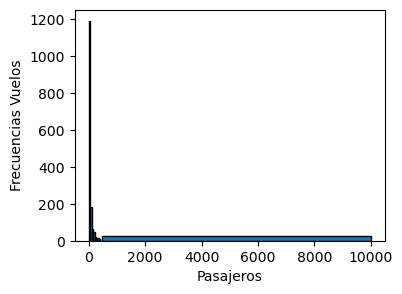

In [50]:
vuelos_bins = np.append(np.arange(0, 500, 50),10000)

plt.figure(figsize=(4,3))
plt.hist(x=aal['Pasajeros'], bins=vuelos_bins, rwidth=1, edgecolor='black')
plt.xlabel('Pasajeros')
plt.ylabel('Frecuencias Vuelos')

Para nuestro interes, nos centramos en vuelos de hasta 700 pasajeros

In [48]:
(aal[aal['Pasajeros'] > 500].shape[0]) / aal.shape[0]

0.015364916773367477

Text(0, 0.5, 'Frecuencias Vuelos')

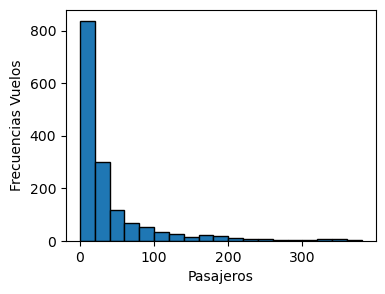

In [52]:
vuelos_bins = np.arange(0, 400, 20)

plt.figure(figsize=(4,3))
plot.hist(x=aal['Pasajeros'], bins=vuelos_bins, rwidth=1, edgecolor='black')
plot.xlabel('Pasajeros')
plot.ylabel('Frecuencias Vuelos')

Ahora, obtengamos el Histograma

Text(0, 0.5, 'Porcentaje por pasajeros')

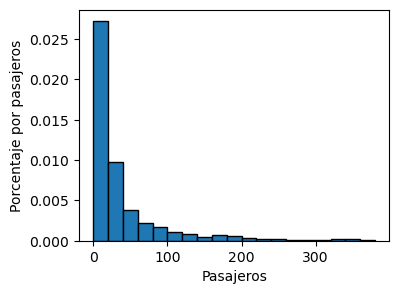

In [54]:
vuelos_bins = np.arange(0, 400, 20)

plt.figure(figsize=(4,3))
plot.hist(x=aal['Pasajeros'], bins=vuelos_bins, rwidth=1, edgecolor='black', density=True)
plot.xlabel('Pasajeros')
plot.ylabel('Porcentaje por pasajeros')

La altura de la barra [0, 20) es algo inferior al 3% por pasajero, lo que significa que algo menos del 60(3*20)% de los vuelos tuvieron entre 0 y 20 pasajeros. Esto se confirma contando las filas:

In [ ]:
(aal.query('0 < Pasajeros <= 20').shape[0] / aal.shape[0])

0.5384122919334187

In [59]:
aal[(aal['Pasajeros'] > 0) & (aal['Pasajeros'] <= 20)].shape[0] / aal.shape[0]

0.5384122919334187

**A. Ejercicio:**   Distribuciones Empíricas vs. Teóricas

Crear histogramas empíricos para:

Recaudación bruta (Bruto)

Recaudación ajustada (Bruto (Ajustado))

Años de lanzamiento (Year)

Comparar con distribuciones teóricas (normal, uniforme, exponencial) y discutir qué modelo se ajusta mejor.

**B. Ejercicio:** Muestreo Aleatorio

Extraer muestras aleatorias de diferentes tamaños (10, 50, 100 películas) con y sin reemplazo.

Calcular estadísticas (media, mediana) de la recaudación ajustada para cada muestra.

Comparar con los valores poblacionales.

**C. Ejercicio:** Ley de los grandes numeros

Tomar muestras crecientes (de 10 en 10 hasta 200 películas).

Graficar la media muestral de Bruto (Ajustado) vs. tamaño de la muestra.

Verificar si converge al valor poblacional.

**D. Ejercicio:** Sesgo y Variabilidad

Crear un muestreo sesgado (ej: solo películas de Disney) y calcular la media de recaudación.

Comparar con la media de muestras aleatorias no sesgadas.

Discutir cómo el sesgo afecta las conclusiones.